In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [6]:
df = []
df = pd.read_csv("/Users/Nick/Downloads/consolidated_fall.csv", index_col=None)

In [19]:
# 5. Split into training and test datasets

Xtrain, Xtest, ytrain, ytest = train_test_split(df.drop('Fall', axis=1), df['Fall'], test_size=0.5, random_state=42)

In [26]:
# 6. Apply Normalisation

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

Xtrain_col = Xtrain.columns
Xtest_col = Xtest.columns

mms.fit(Xtrain)
Xtrain_scale = mms.transform(Xtrain)
Xtest_scale = mms.transform(Xtest)

Xtrain_scale = pd.DataFrame(data = Xtrain_scale, columns = [Xtrain_col])
Xtest_scale = pd.DataFrame(data = Xtest_scale, columns = [Xtest_col])

In [21]:
# Decision Tree Feature Importance

from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# Fit Model
model.fit(Xtrain, ytrain)

ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
print(confusion_matrix(ytest, ypred))

0.9810880665700057
[[27504   310]
 [  290  3622]]


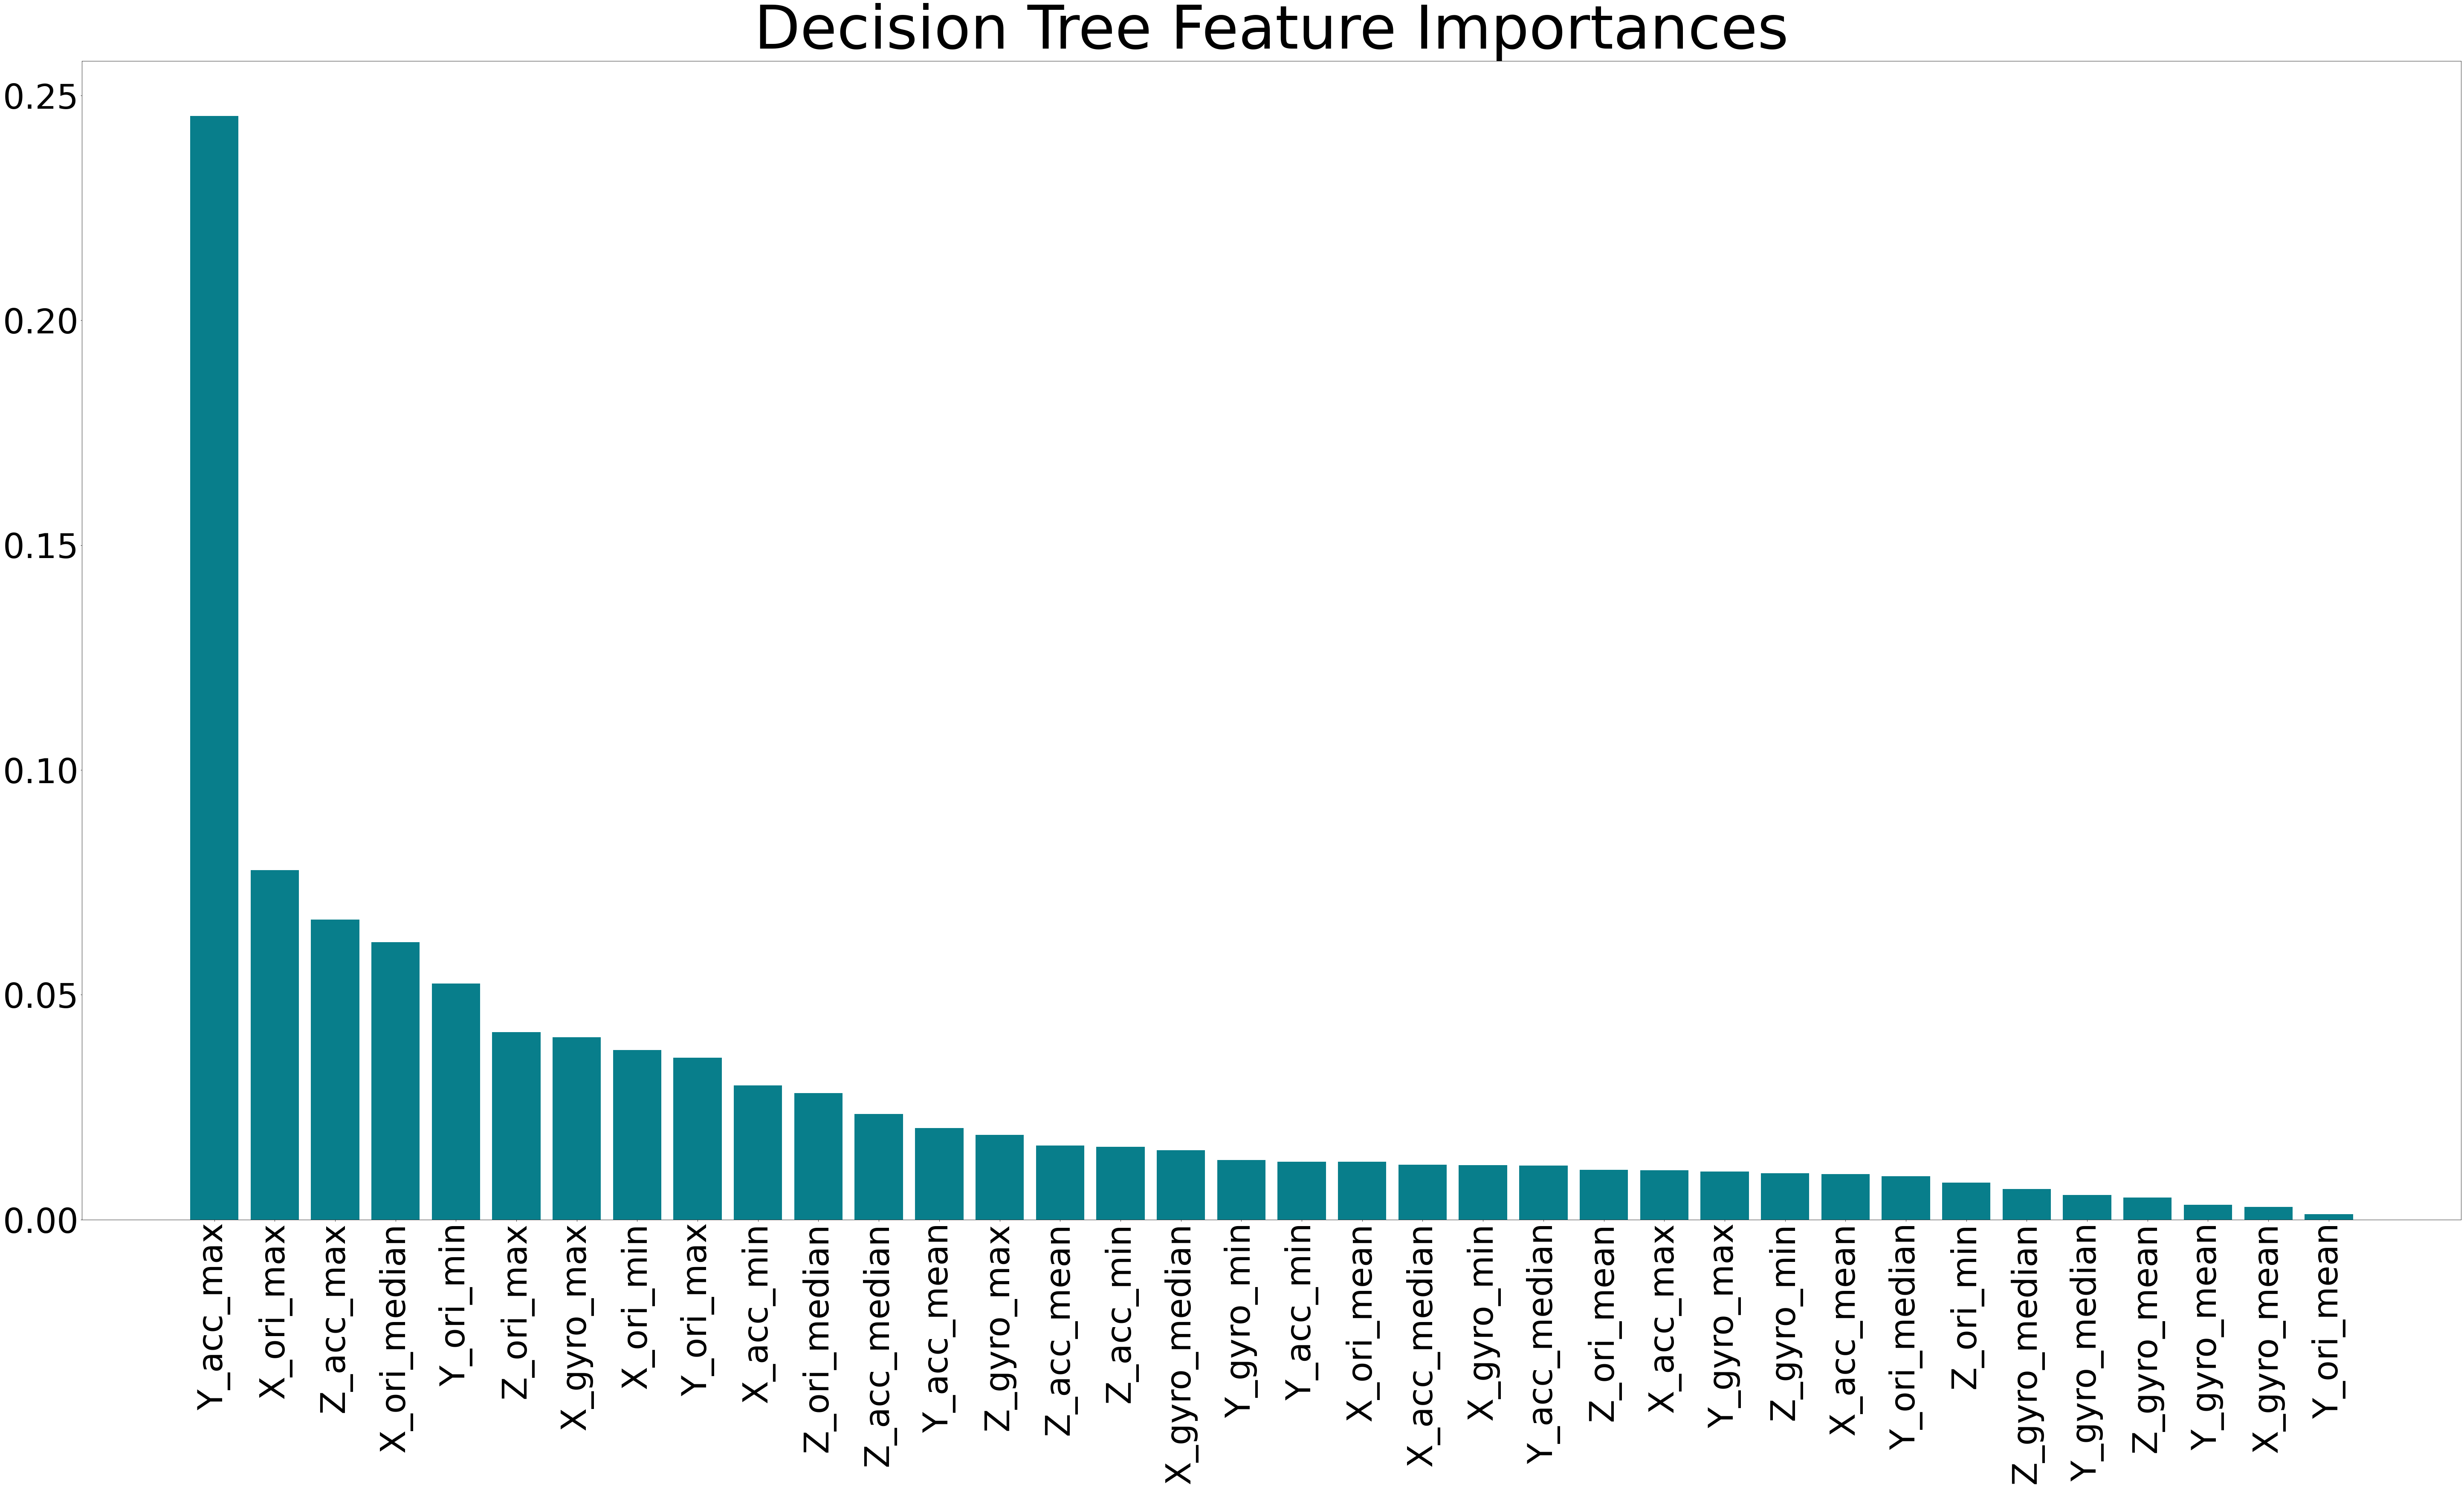

In [22]:
importancesd = pd.DataFrame(data={
    'Attribute': Xtrain.columns,
    'Importance': model.feature_importances_
})

importancesd = importancesd.sort_values(by='Importance', ascending=False)


pyplot.bar(x=importancesd['Attribute'], height=importancesd['Importance'], color='#087E8B')
pyplot.title('Decision Tree Feature Importances', size=140)
pyplot.xticks(rotation='vertical', size=80)
pyplot.yticks(size=80)
pyplot.rcParams["figure.figsize"] = (100,50)
pyplot.show()

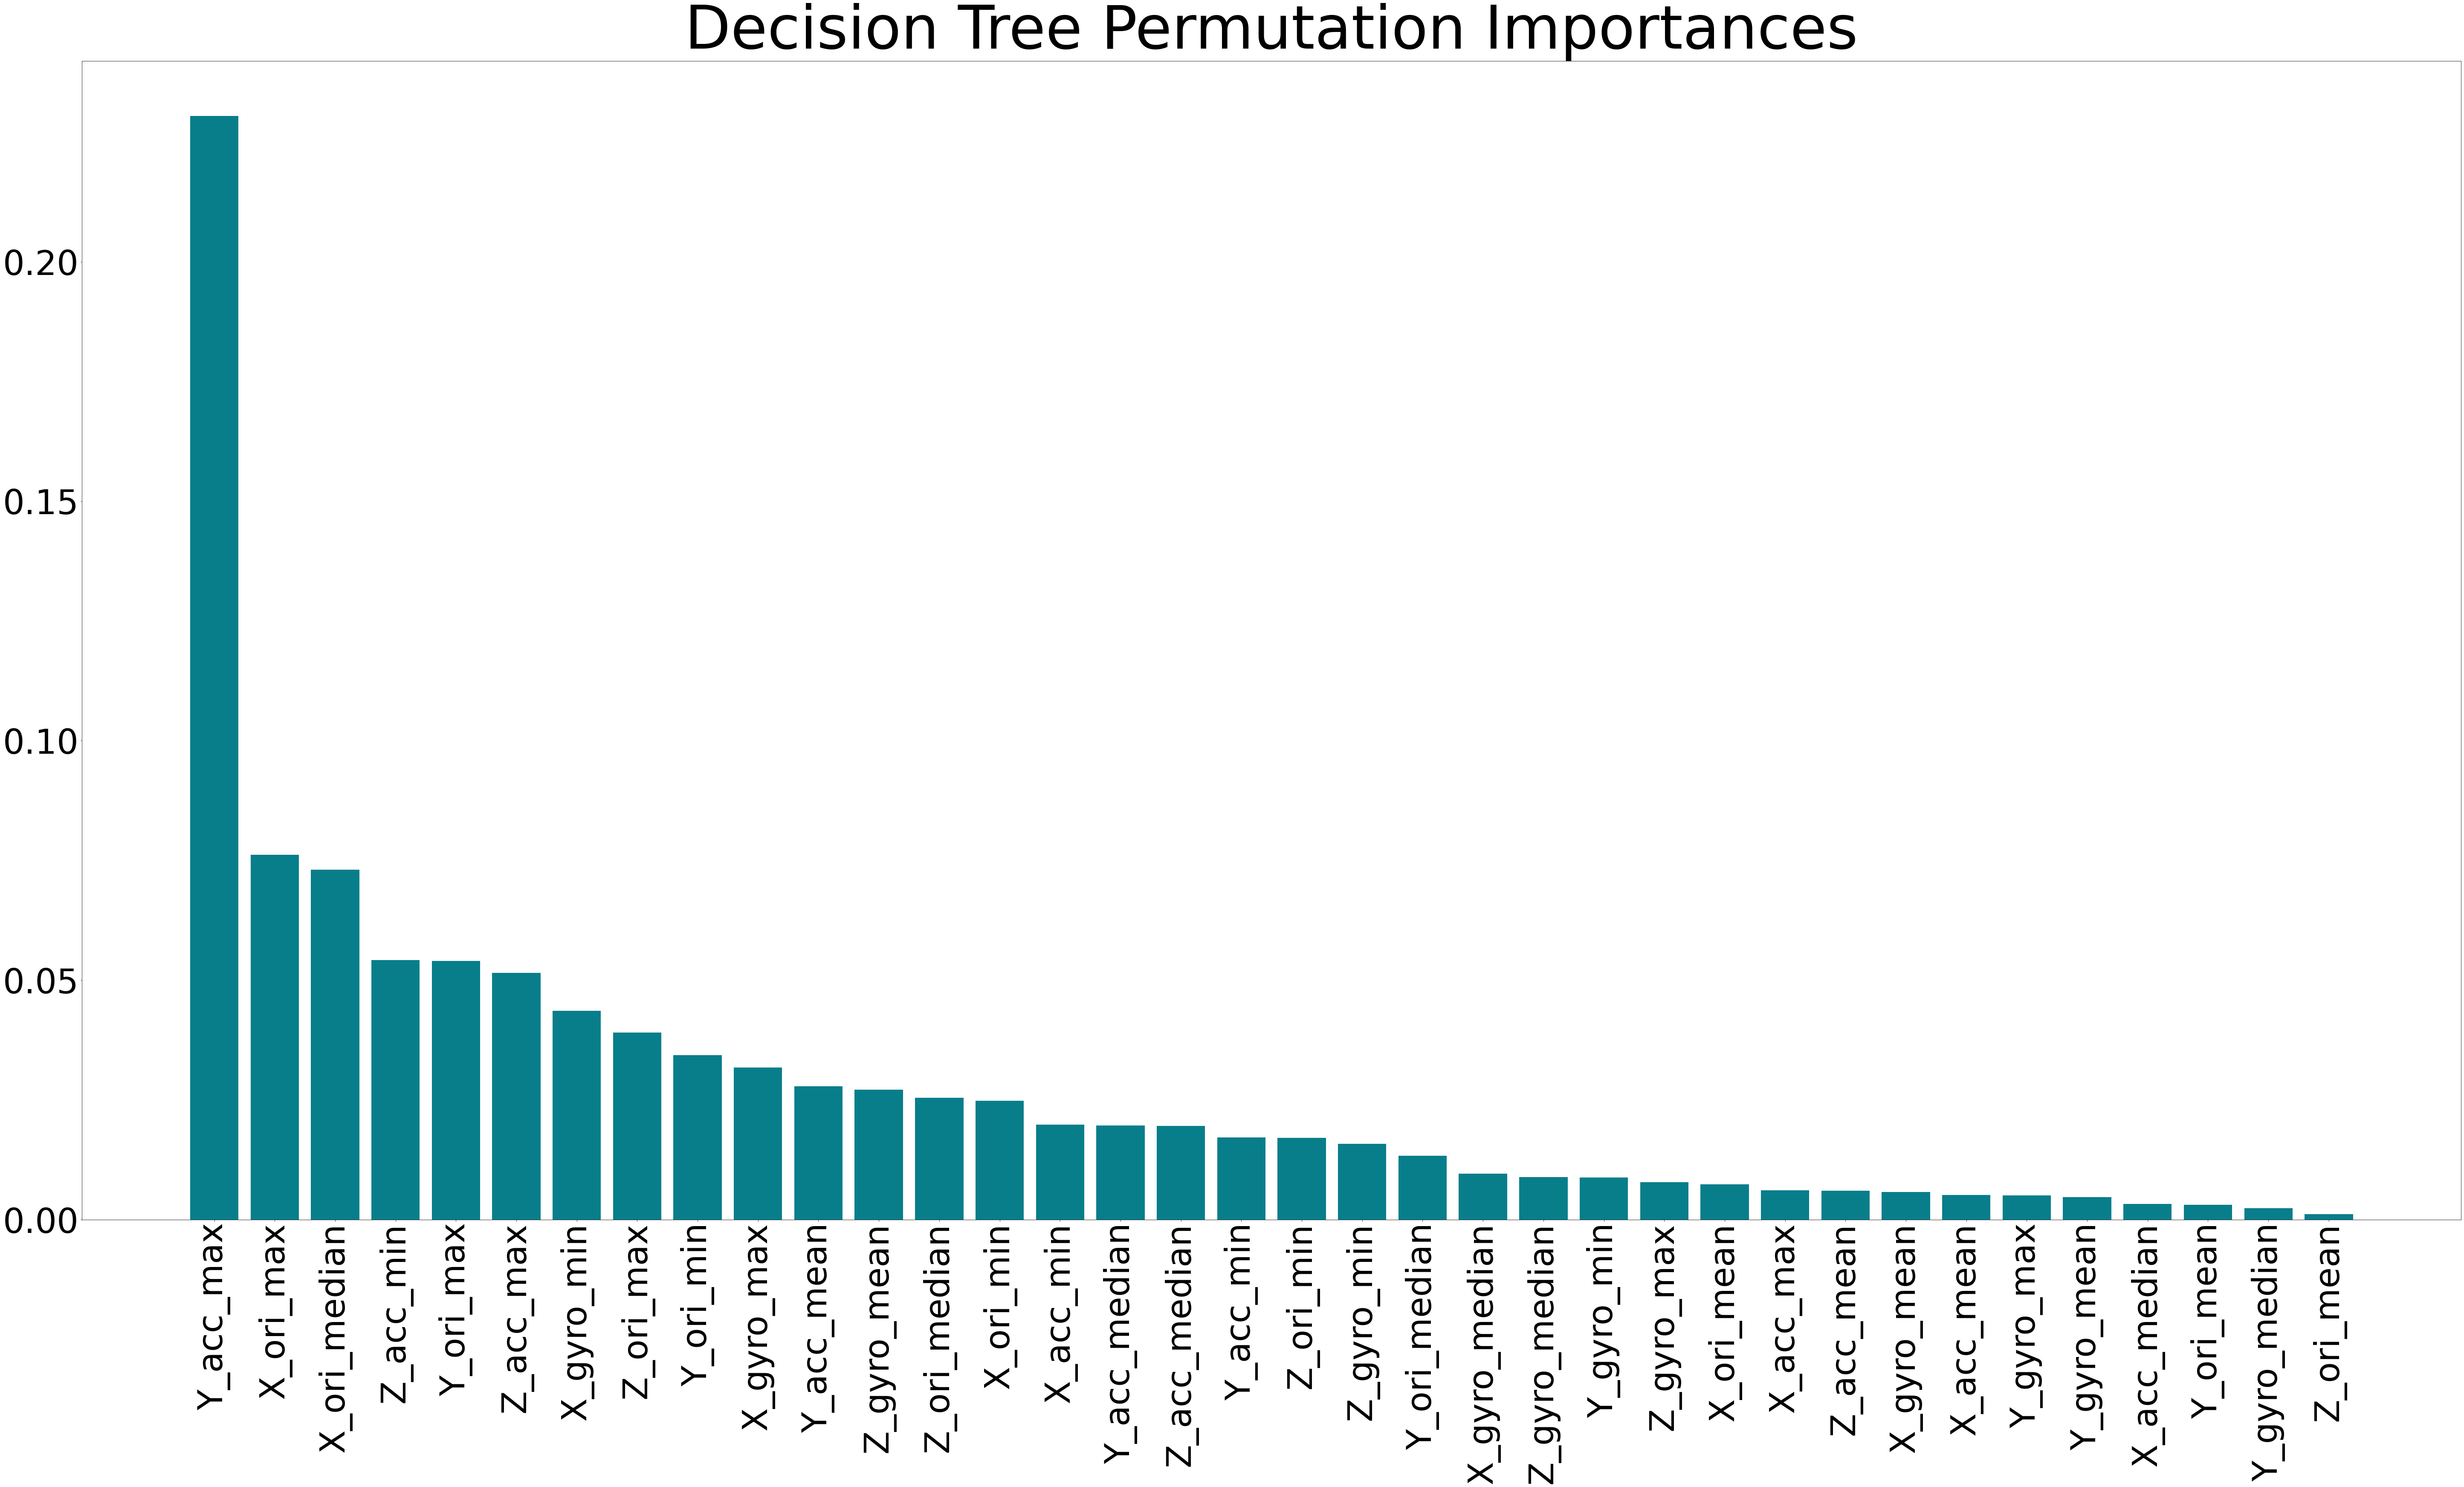

In [23]:
# Decision Tree Permutation Importance

from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# Fit Model
model.fit(Xtrain_scale,ytrain)

# Extract Feature Importance

resultsp = permutation_importance(model, Xtrain_scale, ytrain, n_repeats=5, random_state=0, scoring='accuracy')

importancesp = pd.DataFrame(data={
    'Attribute': Xtrain.columns,
    'Importance': resultsp.importances_mean
})

importancesp = importancesp.sort_values(by='Importance', ascending=False)


pyplot.bar(x=importancesp['Attribute'], height=importancesp['Importance'], color='#087E8B')
pyplot.title('Decision Tree Permutation Importances', size=140)
pyplot.xticks(rotation='vertical', size=80)
pyplot.yticks(size=80)
pyplot.rcParams["figure.figsize"] = (100,50)
pyplot.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = model = KNeighborsClassifier(n_neighbors = 3)

model.fit(Xtrain, ytrain)

ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
print(confusion_matrix(ytest, ypred))

0.9859736493727542
[[27648   166]
 [  279  3633]]


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#Define Parameters
param_grid = {'n_neighbors':(3, 5, 10), 
              'weights' : ('distance', 'uniform'),
              'algorithm' : ('ball_tree', 'kd_tree', 'brute'),
              'p' : (1,2)}

model = model = KNeighborsClassifier()

grid = GridSearchCV(model, param_grid, refit = True, verbose = 3)
                    
grid.fit(Xtrain_scale,ytrain)

best_params = grid.best_params_
print(best_params)
grid_predictions = grid.predict(Xtest_scale)
print(classification_report(ytest, grid_predictions)) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   8.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   7.7s
[CV 3/5] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   8.2s
[CV 4/5] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   8.5s
[CV 5/5] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   8.2s
[CV 1/5] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   7.9s
[CV 2/5] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   9.2s
[CV 3/5] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   8.8s
[CV 4/5] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   8.3s
[CV 5/5] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   8.7s
[CV 1/5] END algorithm=ball_tree,

[CV 2/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=distance; total time=   3.9s
[CV 3/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=distance; total time=   3.3s
[CV 4/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=distance; total time=   4.7s
[CV 5/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=distance; total time=   3.9s
[CV 1/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform; total time=   3.5s
[CV 2/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform; total time=   5.6s
[CV 3/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform; total time=   5.7s
[CV 4/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform; total time=   4.1s
[CV 5/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform; total time=   6.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=10, p=1, weights=distance; total time=  10.2s
[CV 2/5] END algorithm=kd_tree, n_neighbors=10, p=1, weights=distance; total time=   8.4s
[CV 3/5] END algorithm=k

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model = model = KNeighborsClassifier(algorithm = 'ball_tree', 
                             n_neighbors = 3, 
                             p = 1, 
                             weights= 'distance')

model.fit(Xtrain_scale, ytrain)

ypred = model.predict(Xtest_scale)
print(accuracy_score(ytest, ypred))
print(confusion_matrix(ytest, ypred))

0.9959024144235012
[[27759    55]
 [   75  3837]]


In [34]:
#XGBoost

import xgboost
from xgboost import XGBClassifier

#Define Parameters
param_grid = {'learning_rate' :(.1, 1),
              'n_estimators' : (100, 300),
              'max_depth' :(5,10),
              'min_child_weight' : (5,10)}

model = XGBClassifier(random_state=12, eval_metric = 'logloss', use_label_encoder=False)

grid = GridSearchCV(model, param_grid, refit = True, verbose = 3)
                    
grid.fit(Xtrain_scale,ytrain)

best_params = grid.best_params_
print(best_params)
grid_predictions = grid.predict(Xtest_scale)
print(classification_report(ytest, grid_predictions)) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100; total time=   6.8s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100; total time=   5.9s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100; total time=   5.9s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100; total time=   6.4s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100; total time=   6.1s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300; total time=  18.6s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300; total time=  21.5s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300; total time=  19.3s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300; total time=  18.8s
[CV 5/5] END learning

{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     27814
           1       0.99      0.96      0.97      3912

    accuracy                           0.99     31726
   macro avg       0.99      0.98      0.99     31726
weighted avg       0.99      0.99      0.99     31726



In [37]:
import xgboost
from xgboost import XGBClassifier

model = XGBClassifier( n_estimators = 300,
                       learning_rate = .1,
                       max_depth = 10, 
                       min_child_weight = 5, 
                       random_state = 12,
                       eval_metric = 'logloss', 
                       use_label_encoder=False)

# Fit Model
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest, ypred))

0.9942949000819518
[[27784    30]
 [  151  3761]]
